In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np

data_analyst = pd.read_csv('/kaggle/input/data-analyst-job-postings-google-search/gsearch_jobs.csv')
DA = data_analyst
DA.head()

,Unnamed: 0,index,title,company_name,location,via,description,extensions,job_id,thumbnail,...,commute_time,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,description_tokens
0,0,0,Data Analyst,Chloeta,"Oklahoma City, OK",via ZipRecruiter,Job Summary: The Data Analyst oversees data pr...,"['21 hours ago', 'Full-time', 'Health insuranc...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['python', 'r']"
1,1,1,Junior Data Analyst/Scientist Role - Contract ...,Upwork,Anywhere,via Upwork,"Company\n\nThe TAC Index provides independent,...","['17 hours ago', 'Work from home', 'Contractor...",eyJqb2JfdGl0bGUiOiJKdW5pb3IgRGF0YSBBbmFseXN0L1...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['pandas', 'mongodb', 'mysql', 'matlab', 'pyth..."
2,2,2,Data Analyst,ATC,United States,via LinkedIn,Job Title: Entry Level Business Analyst / Prod...,"['12 hours ago', 'Full-time', 'Health insurance']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
3,3,3,Data Analyst,Guidehouse,"Topeka, KS",via Nexxt,Job Family :\n\nData Science & Analysis (Digit...,"['10 hours ago', 'Full-time', 'Health insuranc...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['word', 'qlik', 'powerpoint', 'outlook', 'per..."
4,4,4,Data Analyst,AnMed Health LLC,Anywhere,via LinkedIn,"AnMed is a dynamic, comprehensive health syste...","['18 hours ago', 'Work from home', 'Part-time'...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]


In [3]:
# Let's exploring all the attributes

DA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51746 entries, 0 to 51745
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           51746 non-null  int64  
 1   index                51746 non-null  int64  
 2   title                51746 non-null  object 
 3   company_name         51746 non-null  object 
 4   location             51709 non-null  object 
 5   via                  51737 non-null  object 
 6   description          51746 non-null  object 
 7   extensions           51746 non-null  object 
 8   job_id               51746 non-null  object 
 9   thumbnail            32280 non-null  object 
 10  posted_at            51746 non-null  object 
 11  schedule_type        51562 non-null  object 
 12  work_from_home       24905 non-null  object 
 13  salary               8891 non-null   object 
 14  search_term          51746 non-null  object 
 15  date_time            51746 non-null 

In [4]:
# Statistical Analysis of Salaries
DA_salary_stats = DA[['salary_min', 'salary_avg', 'salary_hourly', 'salary_max']].dropna().describe()
print(DA_salary_stats)

        salary_min   salary_avg  salary_hourly   salary_max
count  5158.000000  5158.000000    5158.000000  5158.000000
mean     29.386076    41.066496      41.066496    52.746915
std      18.599620    22.559778      22.559778    30.336100
min       8.000000     9.000000       9.000000    10.000000
25%      16.000000    23.605000      23.605000    30.000000
50%      20.000000    33.500000      33.500000    47.000000
75%      40.000000    56.500000      56.500000    70.000000
max     200.000000   300.000000     300.000000   500.000000


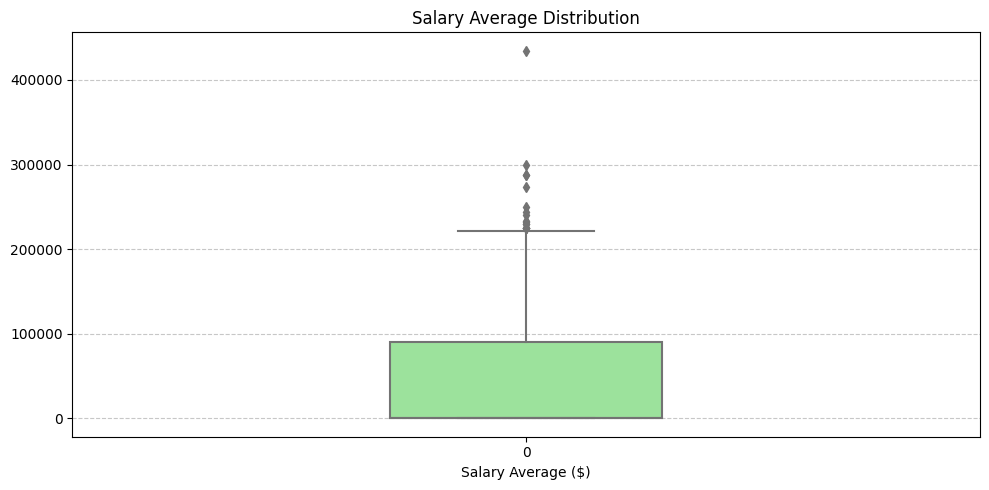

In [20]:
# Box Plot: Distribution of average salaries
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.boxplot(DA['salary_avg'], color='lightgreen', width=0.3)
plt.title('Salary Average Distribution')
plt.xlabel('Salary Average ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [6]:
# Extracting & Counting the top 10 most posted job titles 

DA_filtered = DA.filter(items=['title', 'salary_avg'])
DA_count_titles = DA_filtered['title'].value_counts().head(10)
DA_count_titles

title
Data Analyst                              6069
Senior Data Analyst                       1641
Data Scientist                             892
Data Analyst II                            597
Business Data Analyst                      470
Lead Data Analyst                          401
Data Engineer                              358
Business Intelligence Analyst              313
Data Analyst III                           278
Sr. Data Analyst, Marketing Operations     271
Name: count, dtype: int64

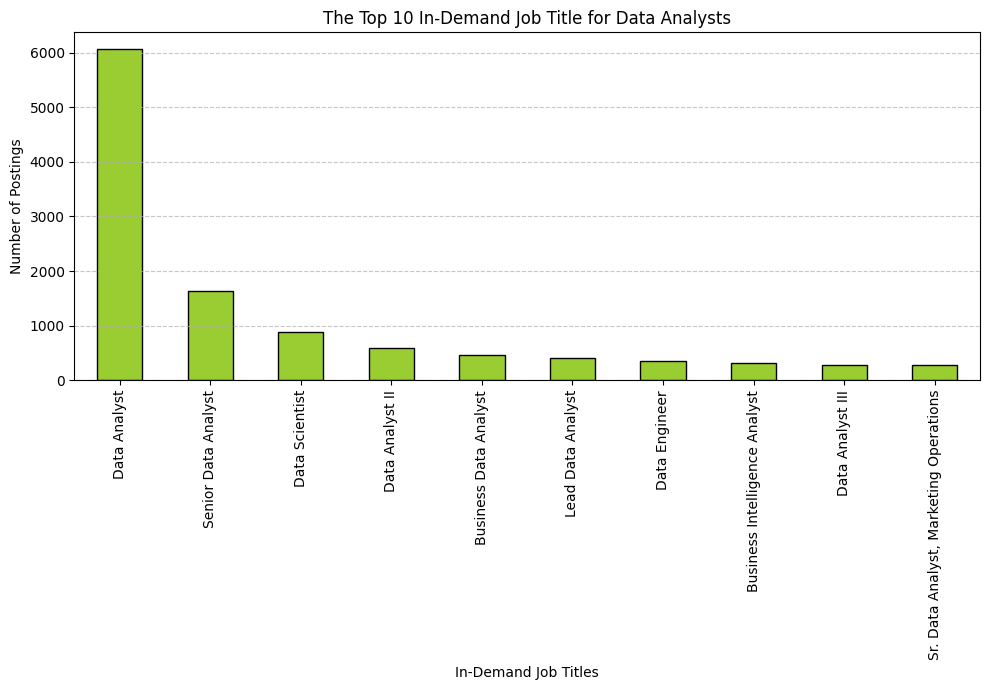

In [8]:
# Bar Chart - Best 10 In-Demand Data Analyst's role
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
DA_count_titles.plot(kind='bar', color='yellowgreen', edgecolor='black')
plt.title('The Top 10 In-Demand Job Title for Data Analysts')
plt.xlabel('In-Demand Job Titles')
plt.ylabel('Number of Postings')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [9]:
# sorted_table = DA_filtered.sort_values(by='salary_avg', ascending=False)
# sorted_table.head(15)

DA_filtered = DA.filter(items=['company_name', 'salary_avg']).dropna()
DA_filtered

DA_best_salaries = DA_filtered.drop_duplicates().sort_values(by='salary_avg', ascending=False)

# Display the sorted unique rows
DA_best_salaries.head(10)

,company_name,salary_avg
20004,PCS Retirement,434500.0
43490,Storm5,300000.0
18857,DoorDash,288000.0
48100,Teradata,288000.0
18854,Pfizer,273500.0
47712,Storm5,250000.0
48099,Teradata,243500.0
40863,GradBay,240000.0
7977,Airtable,233500.0
25830,Claroty,232500.0


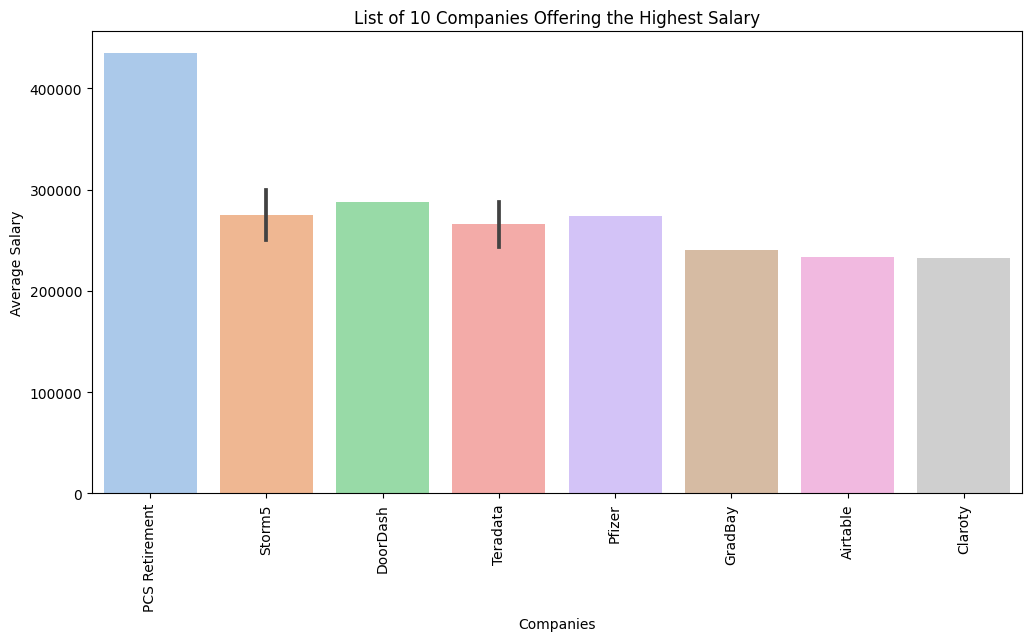

In [58]:
# Bar Chart: Displaying companies offering the highest salaries for Data Analysts
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(x=DA_best_salaries['company_name'].head(10), y=DA_best_salaries['salary_avg'].head(10), palette='pastel')
plt.xlabel('Companies')
plt.ylabel('Average Salary')
plt.xticks(rotation=90)
plt.title('List of 10 Companies Offering the Highest Salary')
plt.show()

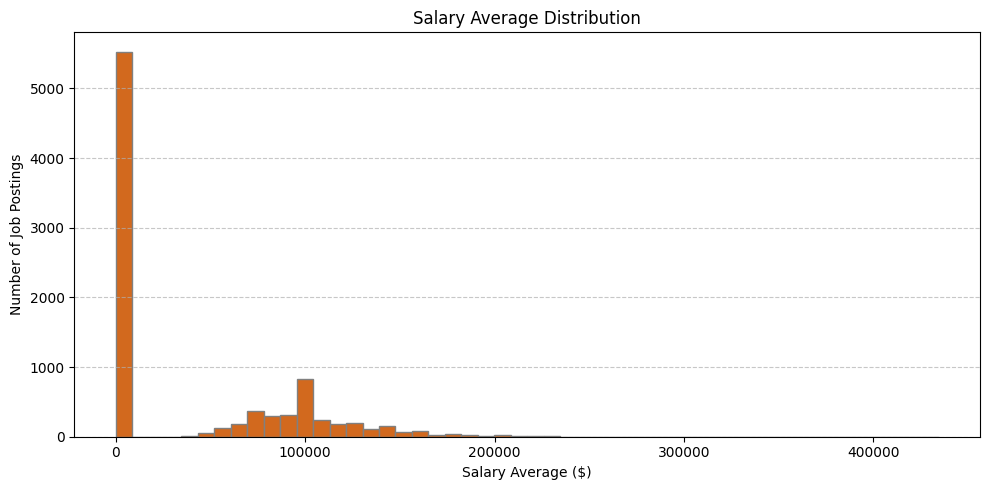

In [57]:
# Histogram: Average Salary Distribution for Data Analysts

plt.figure(figsize=(10, 5))
plt.hist(DA_filtered['salary_avg'].dropna(), bins=50, color='chocolate', edgecolor='gray')
plt.title('Salary Average Distribution')
plt.xlabel('Salary Average ($)')
plt.ylabel('Number of Job Postings')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [12]:
# Exploring a list of the best 15 required skills set

DA_skills = data_analyst['description_tokens'].dropna().explode()
DA_best_skills = (DA_skills.value_counts()).head(15)
DA_best_skills

# R, SQL and Excels are among the most required skills for data analysts, accounting for about half all of skills set from job postings

description_tokens
[]                                             10336
['excel']                                       1884
['sql']                                         1791
['sql', 'excel']                                 907
['go']                                           342
['tableau']                                      339
['sql', 'tableau']                               326
['power_bi']                                     309
['python']                                       288
['python', 'power_bi']                           283
['spreadsheet']                                  276
['sql', 'tableau', 'excel']                      275
['sql', 'tableau', 'microstrategy', 'jira']      272
['power_bi', 'excel']                            260
['powerpoint', 'excel']                          258
Name: count, dtype: int64

In [13]:
# Extracting and counting the occurrences of each skill

skills = ["r", "sql", "excel", "python", "tableau", 
          "power_bi", "sas", "powerpoint", "word", 
          "azure", "aws", "looker", "spss", "alteryx",
          "sharepoint", "outlook","ssrs", "qlik", "matlab",
          "airflow", "postgresql","mongodb", "gdpr",  "gitlab", "nltk"]

total_skills = {skill: DA['description_tokens'].apply(lambda x: skill in str(x)).sum() for skill in skills}
total_skills

{'r': 29164,
 'sql': 27117,
 'excel': 16996,
 'python': 15912,
 'tableau': 14322,
 'power_bi': 13675,
 'sas': 4545,
 'powerpoint': 3829,
 'word': 3686,
 'azure': 3399,
 'aws': 3130,
 'looker': 2332,
 'spss': 1575,
 'alteryx': 1379,
 'sharepoint': 1188,
 'outlook': 1256,
 'ssrs': 910,
 'qlik': 1020,
 'matlab': 502,
 'airflow': 535,
 'postgresql': 494,
 'mongodb': 229,
 'gdpr': 191,
 'gitlab': 122,
 'nltk': 34}

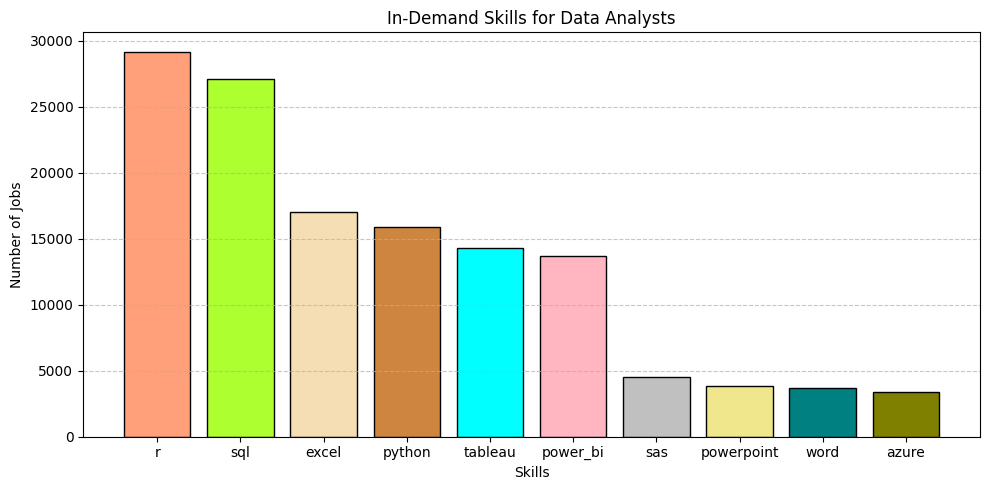

In [14]:
# Bar Chart: Skills Distribution - Best 10 Skills in data analytics

skills = ["r", "sql", "excel", "python", "tableau", "power_bi", "sas", "powerpoint", "word", "azure"]
skill_values = [total_skills[skill] for skill in skills]

plt.figure(figsize=(10, 5))
plt.bar(skills, skill_values, color=['lightsalmon', 'greenyellow', 'wheat', 'peru', 'aqua', 'lightpink', 'silver', 'khaki', 'teal', 'olive'], edgecolor='black')
plt.title('In-Demand Skills for Data Analysts')
plt.xlabel('Skills')
plt.ylabel('Number of Jobs')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [15]:
# Exploring a list of the best 10 platforms posting most jobs

DA_best_platforms = (data_analyst['via'].dropna().value_counts()).head(10)
DA_best_platforms

# As expected, LinkedIn has the highest job posting roles for Data Analysts

via
via LinkedIn            20168
via Upwork               7215
via BeBee                5378
via Trabajo.org          3017
via ZipRecruiter         2846
via Indeed               1834
via Snagajob              964
via Jobs Trabajo.org      810
via Adzuna                752
via Built In              605
Name: count, dtype: int64

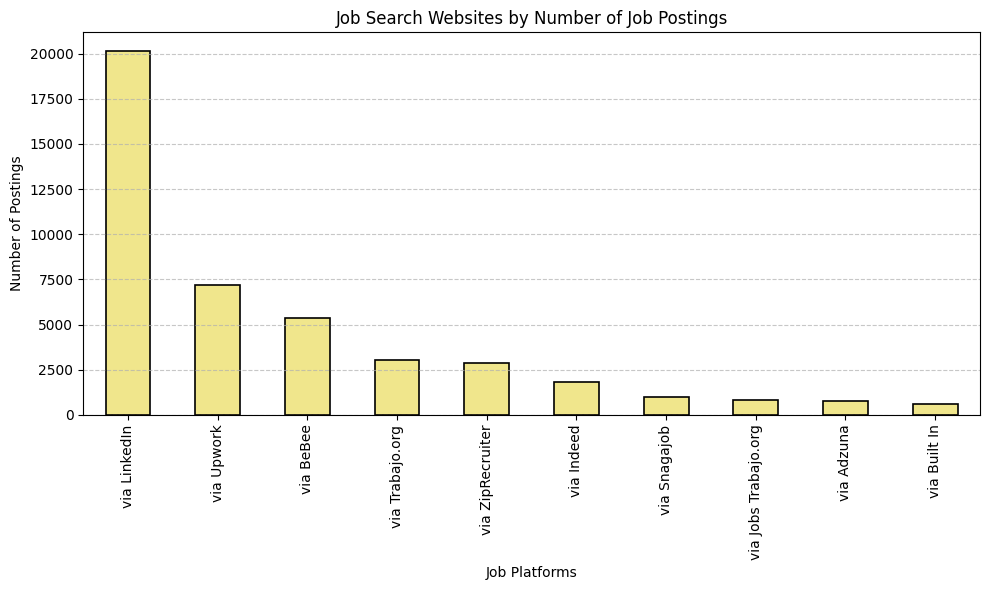

In [51]:
# Bar Chart - Best 10 platforms for Data Analysis Roles with the highest number of Job Postings

plt.figure(figsize=(10, 6))
DA_best_platforms.head(10).plot(kind='bar', color='khaki', edgecolor='black', lw=1.2)
plt.title('Job Search Websites by Number of Job Postings')
plt.xlabel('Job Platforms')
plt.ylabel('Number of Postings')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [21]:
# Extracting & Counting Benefits 

benefits = ["Health insurance", "Dental insurance", "Paid time off", 
                 "Work from home", "Full-time", "No degree mentioned"]

# Extracting and counting the occurrences of each benefit
total_benefits = {benefit: DA['extensions'].apply(lambda x: benefit in str(x)).sum() for benefit in benefits}

total_benefits

{'Health insurance': 17416,
 'Dental insurance': 11286,
 'Paid time off': 11359,
 'Work from home': 24905,
 'Full-time': 38751,
 'No degree mentioned': 15741}

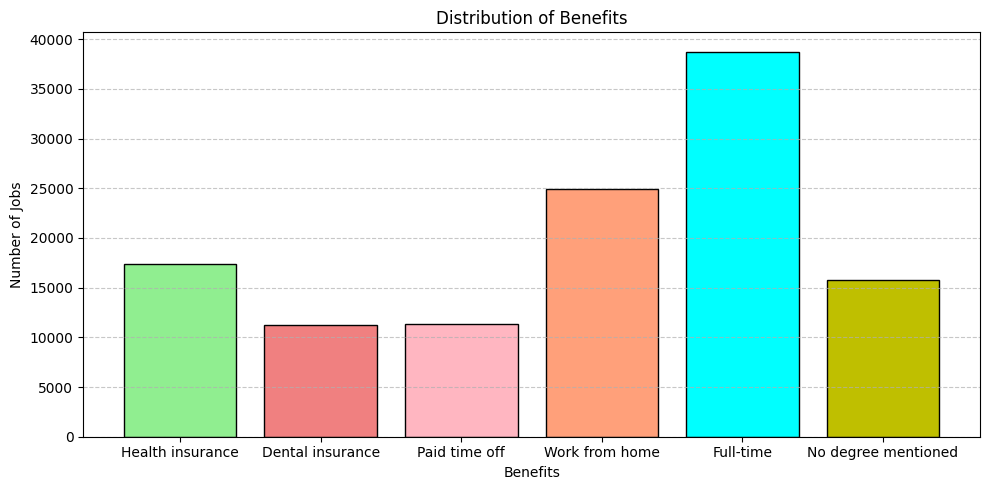

In [27]:
# Bar Chart: Job Benefits Distribution

benefits = ["Health insurance", "Dental insurance", "Paid time off", "Work from home", "Full-time", "No degree mentioned"]
benefits_values = [total_benefits[benefit] for benefit in benefits]

plt.figure(figsize=(10, 5))
plt.bar(benefits, benefits_values, color=['lightgreen', 'lightcoral', 'lightpink', 'lightsalmon', 'cyan', 'y'], edgecolor='black')
plt.title('Distribution of Benefits')
plt.xlabel('Benefits')
plt.ylabel('Number of Jobs')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [23]:
# Let's see which companies offers the great combinations of 5 benifts. 
# Extracting combinations of five(5) benefits from the extensions column
from itertools import combinations

def extract_benefit_combinations(extensions):
    present_benefits = [benefit for benefit in benefits if benefit in str(extensions)]
    return list(combinations(present_benefits, 5))

benefit_combinations = DA['extensions'].apply(extract_benefit_combinations).explode().dropna()

# Counting the occurrences of each benefit combination
benefit_combinations_counts = benefit_combinations.value_counts()
benefit_combinations_counts

extensions
(Health insurance, Dental insurance, Paid time off, Work from home, Full-time)              3145
(Health insurance, Dental insurance, Paid time off, Full-time, No degree mentioned)         1203
(Health insurance, Dental insurance, Work from home, Full-time, No degree mentioned)         736
(Health insurance, Paid time off, Work from home, Full-time, No degree mentioned)            721
(Health insurance, Dental insurance, Paid time off, Work from home, No degree mentioned)     623
(Dental insurance, Paid time off, Work from home, Full-time, No degree mentioned)            597
Name: count, dtype: int64

In [25]:
# Matching companies with specific combination of benefits is offered, and listing the top 10

combined_benefits_df = DA[DA['extensions'].apply(lambda x: 
                                                 all(benefit in str(x) for benefit in 
                                                     ["Health insurance", "Dental insurance", "Paid time off", "Work from home", "Full-time", "No degree mentioned"]))]

# Counting the occurrences of companies offering the combination of benefits
top_companies_offering_benefits = combined_benefits_df['company_name'].value_counts().head(10)
top_companies_offering_benefits

company_name
Talentify.io      73
WEX               14
Dice              11
RVO Health        10
EquipmentShare     7
Curology           6
Advantasure        6
Storm Search       6
HopSkipDrive       6
Insight Global     5
Name: count, dtype: int64

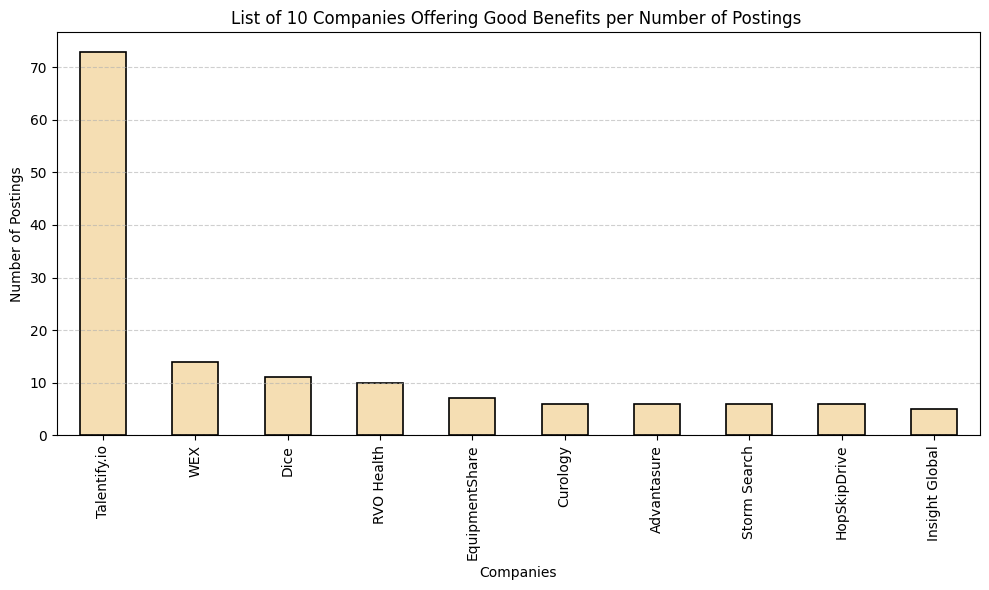

In [53]:
# Bar Chart - List of 10 companies with good benefits (5 benefits at least)

plt.figure(figsize=(10, 6))
top_companies_offering_benefits.head(10).plot(kind='bar', color='wheat', edgecolor='black', lw=1.2)
plt.title('List of 10 Companies Offering Good Benefits per Number of Postings ')
plt.xlabel('Companies')
plt.ylabel('Number of Postings')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# These Companies offer a combination of 5 out of 6 benefits, which is great!. 
# Candidats are likelihood to choose one these companies because they're offering FIVE benifits!!!!

In [46]:
# Extracting and Counting job postings by companies

DA_company = data_analyst['company_name'].dropna().value_counts()
DA_best_companies = DA_company.head(10)
DA_best_companies

# UPWORK has most OF job posting, and consists of nearly 60 percent of jobs from the list.

company_name
Upwork                              7241
Talentify.io                        2065
Walmart                             1671
Dice                                 843
EDWARD JONES                         747
Corporate                            612
Cox Communications                   538
Insight Global                       434
Centene Corporation                  234
Staffigo Technical Services, LLC     167
Name: count, dtype: int64

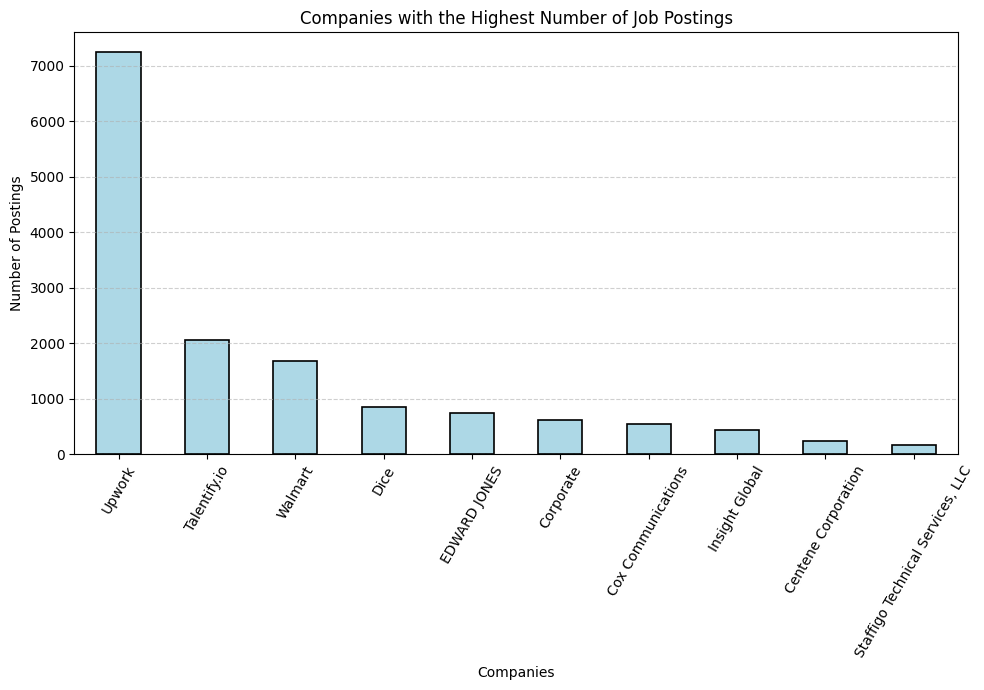

In [54]:
# Bar Chart - 10 Popular Role for Data Anlysts according to the number of Job Postings
plt.figure(figsize=(10, 7))
DA_best_companies.head(10).plot(kind='bar', color='lightblue', edgecolor='black', lw=1.2)
plt.title('Companies with the Highest Number of Job Postings')
plt.xlabel('Companies')
plt.ylabel('Number of Postings')
plt.xticks(rotation=60)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [44]:
# Extracting & Counting the total job posting per location 

location_counts = DA['location'].dropna().value_counts()
top_locations = location_counts.head(10)
top_locations

location
 Anywhere                  17811
  United States             9881
Anywhere                    7094
United States               3660
  Oklahoma City, OK         1013
  Kansas City, MO            826
  Jefferson City, MO         542
Kansas City, MO              528
  Bentonville, AR            419
Oklahoma City, OK            380
Name: count, dtype: int64

In [45]:
# Sorting the number of job postings per States 

def sep_state(location):
    if isinstance(location, str):
        # Splitting by comma and taking the last part (usually the state)
        portion = location.split(',')
        if len(portion) > 1:
            return portion[-1].strip()
    return None

DA['state'] = DA['location'].apply(sep_state)
state_counts = DA['state'].value_counts().head(10)
state_counts

state
MO    4582
OK    2950
KS    2641
AR    2499
CA     114
TX      65
NE      27
NY      13
MA      10
PA       9
Name: count, dtype: int64